# 1. Import Data

In [1]:
!pip install pandas scikit-learn xgboost dill

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("regressiondata.csv",index_col="ID")

In [4]:
df.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
0,2020.12,17.0,467.644775,4.0,5222.0,467104
1,2021.04,36.0,659.924963,3.0,5222.0,547714
2,2019.04,38.0,305.475941,7.0,5213.0,277232
3,2021.10,11.0,607.034754,5.0,5213.0,295958
4,2021.02,14.0,378.827222,5.0,5614.0,439963


In [5]:
df.iloc[320]

TransactionDate         2020.06
HouseAge                   15.0
DistanceToStation    1715.61405
NumberOfPubs                2.0
PostCode                 5212.0
HousePrice               153989
Name: 320, dtype: object

In [6]:
df.size

56136

# Split Data

In [7]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.3, random_state=1234)

In [8]:
train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286
5758,2020.01,17.0,614.851833,3.0,5213.0,253332
4030,2021.06,34.0,285.892687,9.0,5614.0,486532
8447,2020.12,0.0,195.213314,6.0,5222.0,595168
4370,2019.03,34.0,124.082230,8.0,5212.0,250495


# Data Analysis

In [9]:
train.dtypes

TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

In [10]:
train.iloc[0]['HousePrice']

'460286'

House price is a string which is not alright.
Post Code should be a category
Transaction Date is a float which is not good.

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6549 entries, 8450 to 8915
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionDate    6548 non-null   float64
 1   HouseAge           6546 non-null   float64
 2   DistanceToStation  6547 non-null   float64
 3   NumberOfPubs       6547 non-null   float64
 4   PostCode           6547 non-null   float64
 5   HousePrice         6544 non-null   object 
dtypes: float64(5), object(1)
memory usage: 358.1+ KB


In [12]:
# Create summary statistics
train.describe() # get statistics on numerical columns

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
count,6548.000000,6546.000000,6547.000000,6.547000e+03,6547.000000
mean,2020.072389,17.375344,1091.759504,7.677828e+02,5294.499160
std,0.815922,11.469272,1270.038426,6.179430e+04,158.397718
min,2019.010000,0.000000,23.829424,0.000000e+00,5212.000000
25%,2019.100000,9.000000,268.649033,1.000000e+00,5213.000000
50%,2020.070000,15.000000,545.312168,4.000000e+00,5217.000000
75%,2021.040000,28.000000,1529.343484,6.000000e+00,5222.000000
max,2021.120000,43.000000,6486.256457,4.999999e+06,5614.000000


In [13]:
# Type cast incorrect datatypes to new datatypes
train["PostCode"] = train["PostCode"].astype(str)
train["TransactionDate"] = train["TransactionDate"].astype(str)
# train["HousePrice"] = train["HousePrice"].astype(float)

In [14]:
# Create summary statistics for non-numeric features
train.describe(include="object")

,TransactionDate,PostCode,HousePrice
count,6549,6549,6544
unique,37,6,6496
top,2019.01,5212.0,290262
freq,212,1338,2


In [15]:
!pip install matplotlib seaborn

## Visualizations

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

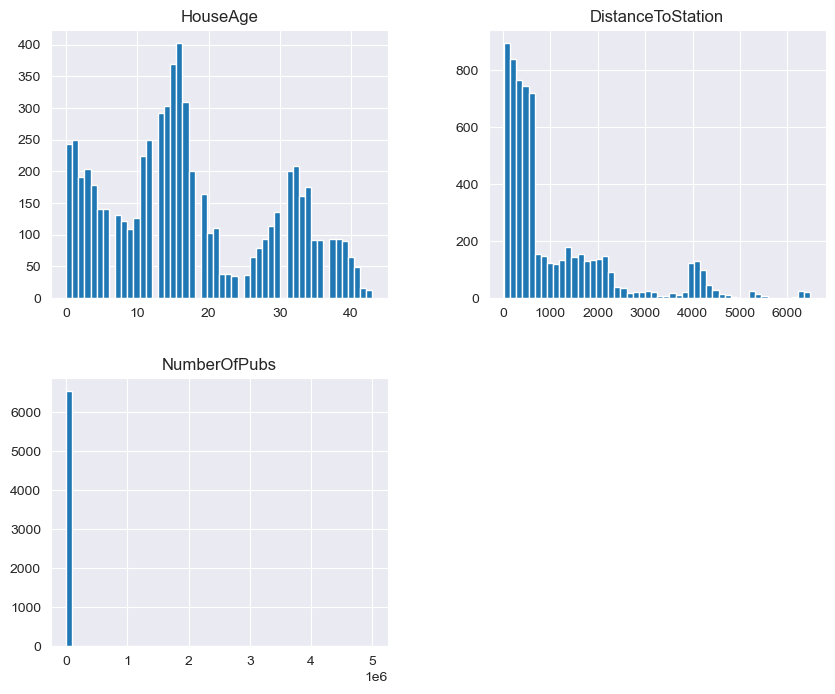

In [17]:
train.hist(figsize=(10,8), bins=50)
plt.show()

In [18]:
# Find the ?? in the dataset
train[train['HousePrice']=='??']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8718,2020.08,16.0,122.432508,5.0,5213.0,??


In [19]:
# Drop the rows that equal '??'
train = train[train['HousePrice']!='??']

In [20]:
train['HousePrice']=train['HousePrice'].astype(float)

In [21]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

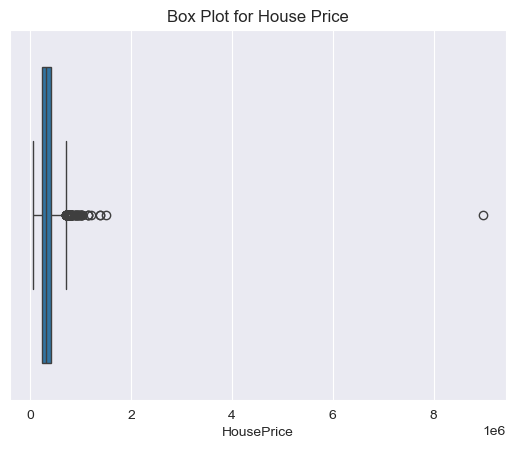

In [22]:
plt.title('Box Plot for House Price')
sns.boxplot(x=train['HousePrice'])
plt.show()

Wee see that we have an outlier
## Drop Outlier

In [23]:
# Find the outlier
train.sort_values('HousePrice').tail(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
9238,2019.11,10.0,169.424413,1.0,5222.0,1205920.0
149,2020.09,9.0,228.930655,1.0,5222.0,1374277.0
6066,2020.12,10.0,234.680008,1.0,5222.0,1374386.0
2749,2021.06,9.0,38.864337,1.0,5222.0,1504501.0
8445,2021.05,0.0,276.789752,9.0,5222.0,8989772.0
8103,2019.05,7.0,640.223538,10.0,5217.0,NaN
7673,nan,NaN,3830.892098,0.0,5217.0,NaN
32,2021.1,29.0,809.864711,8.0,5222.0,NaN
8112,2019.08,20.0,370.088151,NaN,nan,NaN


In [24]:
train = train.drop(8445)

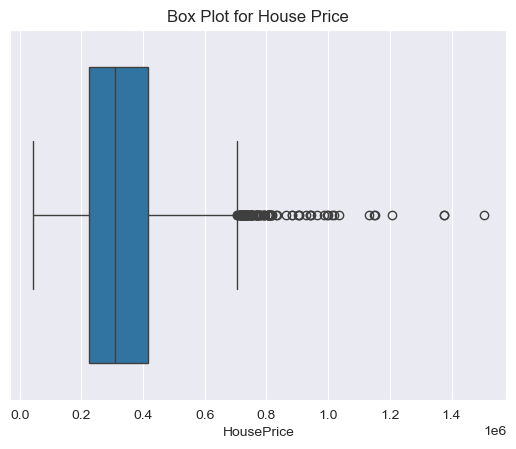

In [25]:
plt.title("Box Plot for House Price")
sns.boxplot(x=train['HousePrice'])
plt.show()

In [26]:
train.sort_values('NumberOfPubs').tail(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
5334,2021.07,33.0,130.200701,10.0,5212.0,326772.0
4738,2021.11,34.0,42.324197,10.0,5614.0,518639.0
1046,2020.01,23.0,568.984852,10.0,5213.0,312165.0
6257,2019.01,34.0,98.166618,10.0,5222.0,489487.0
2916,2021.06,8.0,656.962289,10.0,5217.0,511688.0
422,2019.1,32.0,164.514773,10.0,5614.0,346126.0
5763,2020.02,33.0,326.339631,10.0,5222.0,555253.0
13,2019.05,8.0,273.264542,4999999.0,5213.0,356012.0
2416,2019.06,NaN,NaN,NaN,5222.0,268172.0


In [27]:
# Remove the outlier
train.drop(13, inplace=True) # equivalent to train = train.drop(13)

## Analyze Categorical Features

[]

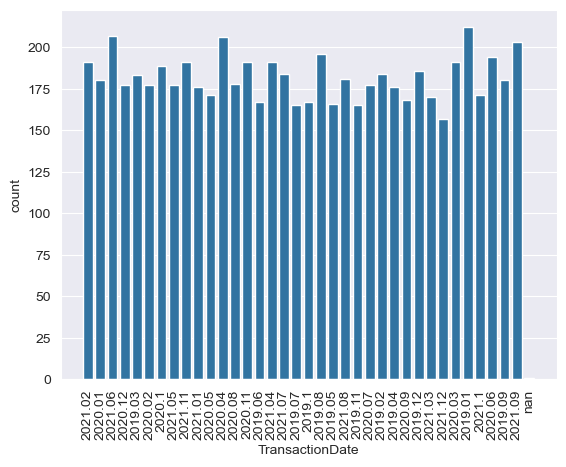

In [28]:
plt.xticks(rotation=90)# rotate the labels on the x axis
sns.countplot(x=train['TransactionDate'])# transactionData is the column we want to visualize
plt.plot()

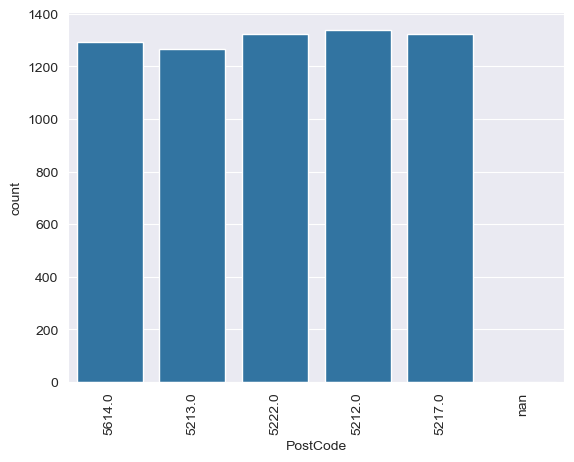

In [29]:
plt.xticks(rotation=90)
sns.countplot(x=train['PostCode'])
plt.show()

## Finding relationships between features using <b>Pearsons Correlation</b> 

In [30]:
# calculates correlation
correlation_table = train.select_dtypes(exclude='object').corr() # we do that for numerical features

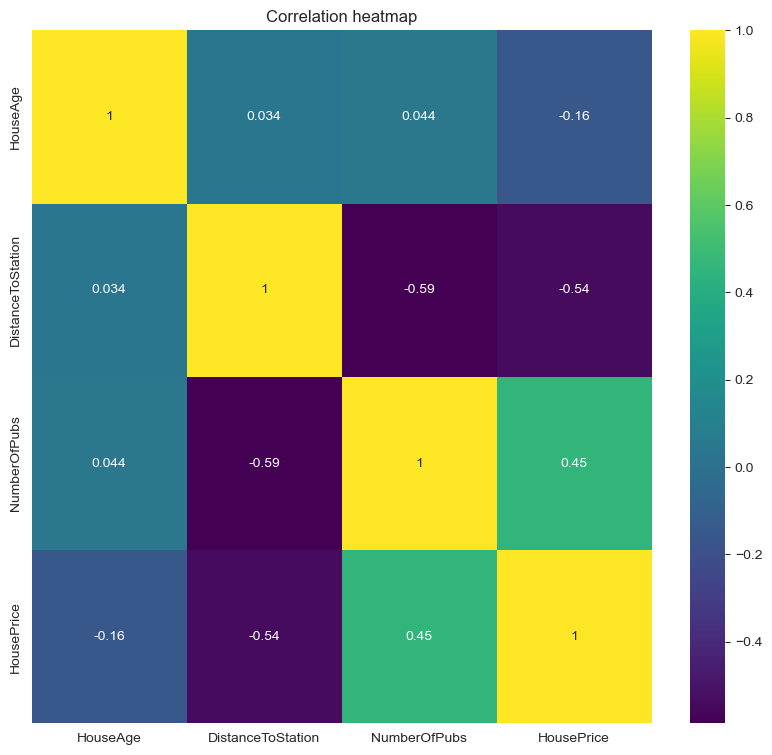

In [31]:
plt.figure(figsize=(10,9))
sns.heatmap(correlation_table, annot=True, cmap='viridis')
plt.title('Correlation heatmap')
plt.show()

We should avoid strong relationships between independent features. We want strong relationships between the dependent feature(HousePrice) and independent features. So we avoid <b>multicollinearity</b>.

<b>Multicollinearity</b> is a statistical concept where several independent variables in a model are correlated. Two variables are considered perfectly collinear if their correlation coefficient is +/- 1.0. Multicollinearity among independent variables will result in less reliable statistical inferences.

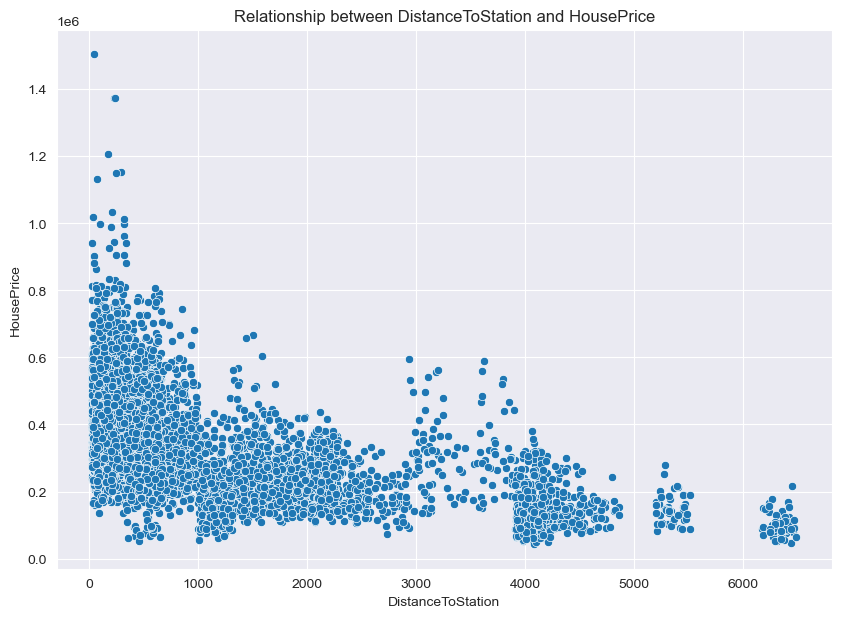

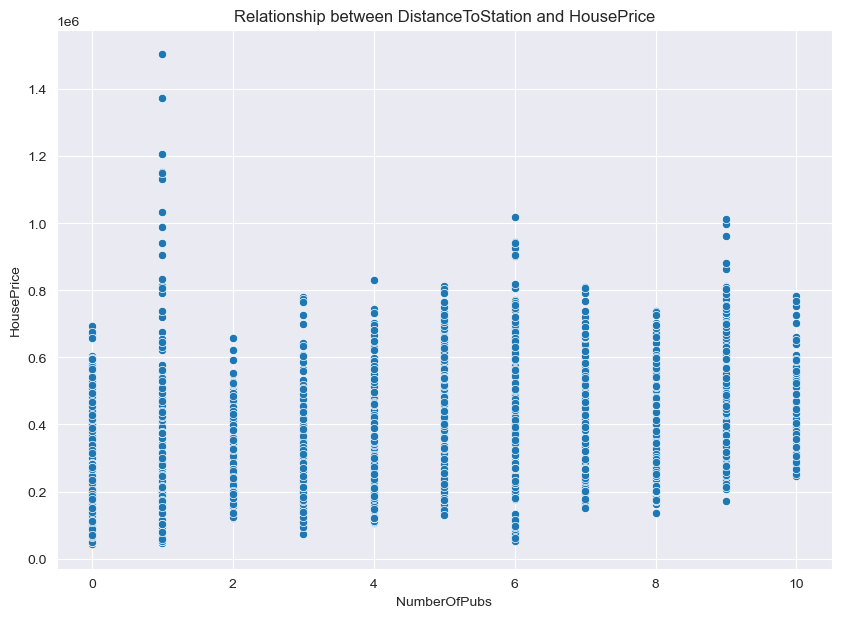

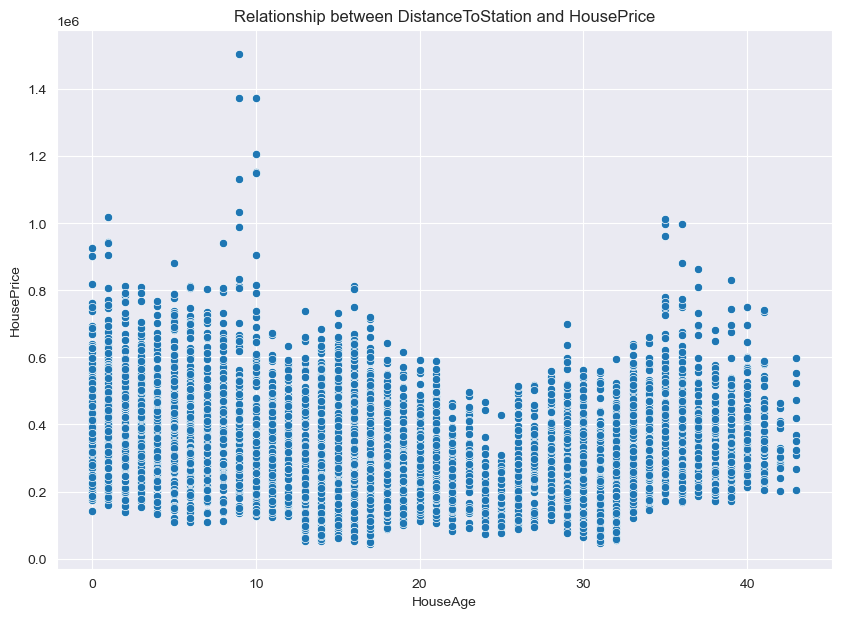

In [32]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=train['DistanceToStation'], y=train['HousePrice'])
plt.title('Relationship between DistanceToStation and HousePrice')
plt.show()

plt.figure(figsize=(10,7))
sns.scatterplot(x=train['NumberOfPubs'], y=train['HousePrice'])
plt.title('Relationship between DistanceToStation and HousePrice')
plt.show()

plt.figure(figsize=(10,7))
sns.scatterplot(x=train['HouseAge'], y=train['HousePrice'])
plt.title('Relationship between DistanceToStation and HousePrice')
plt.show()

## Is Post Code Driving Value?

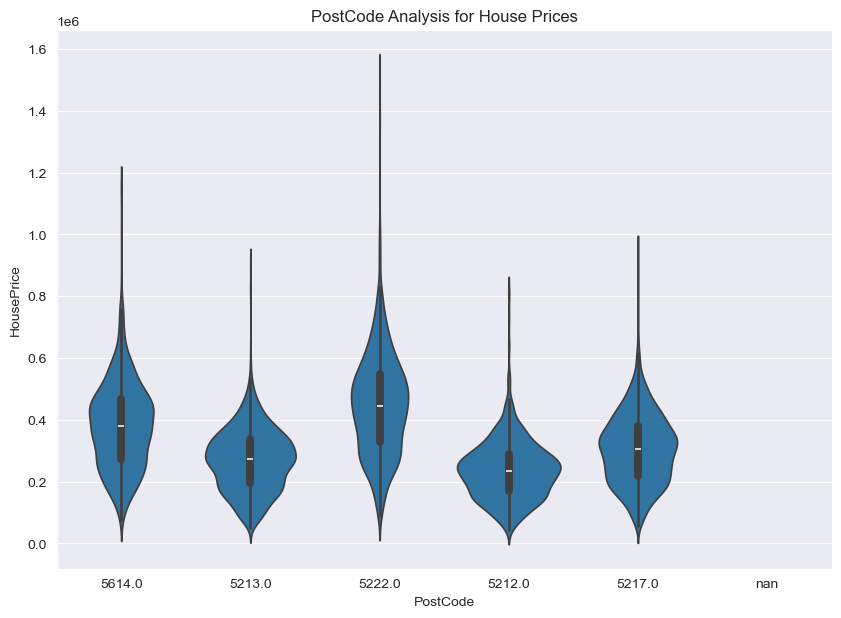

In [33]:
plt.figure(figsize=(10,7))
sns.violinplot(x=train['PostCode'], y=train['HousePrice'])
plt.title('PostCode Analysis for House Prices')
plt.show()

## Date Analysis

In [34]:
# Check for nulls
train[train['TransactionDate'].isnull()]

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,


In [35]:
train[~(train['TransactionDate']=='nan')]# value that aren't null

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286.0
5758,2020.01,17.0,614.851833,3.0,5213.0,253332.0
4030,2021.06,34.0,285.892687,9.0,5614.0,486532.0
8447,2020.12,0.0,195.213314,6.0,5222.0,595168.0
4370,2019.03,34.0,124.082230,8.0,5212.0,250495.0
...,...,...,...,...,...,...
664,2020.08,37.0,375.427313,1.0,5217.0,301492.0
7540,2020.08,34.0,114.362370,5.0,5212.0,174239.0
7221,2020.02,16.0,605.834036,2.0,5217.0,327666.0


In [36]:
train =train[~(train['TransactionDate']=='nan')]
train[train['TransactionDate']=='nan']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,


In [37]:
# Drop missing house prices
train = train[~train['HousePrice'].isnull()]

In [38]:
int(train.iloc[0]['TransactionDate'][:4])

2021

In [39]:
int(train.iloc[0]['TransactionDate'][5:])

2

In [40]:
train['YearSold'] = train['TransactionDate'].apply(lambda x: x[:4]).astype(int)
train['MonthSold'] = train['TransactionDate'].apply(lambda x: x[5:]).astype(int) 

In [41]:
train

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice,YearSold,MonthSold
ID,,,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286.0,2021,2
5758,2020.01,17.0,614.851833,3.0,5213.0,253332.0,2020,1
4030,2021.06,34.0,285.892687,9.0,5614.0,486532.0,2021,6
8447,2020.12,0.0,195.213314,6.0,5222.0,595168.0,2020,12
4370,2019.03,34.0,124.082230,8.0,5212.0,250495.0,2019,3
...,...,...,...,...,...,...,...,...
664,2020.08,37.0,375.427313,1.0,5217.0,301492.0,2020,8
7540,2020.08,34.0,114.362370,5.0,5212.0,174239.0,2020,8
7221,2020.02,16.0,605.834036,2.0,5217.0,327666.0,2020,2


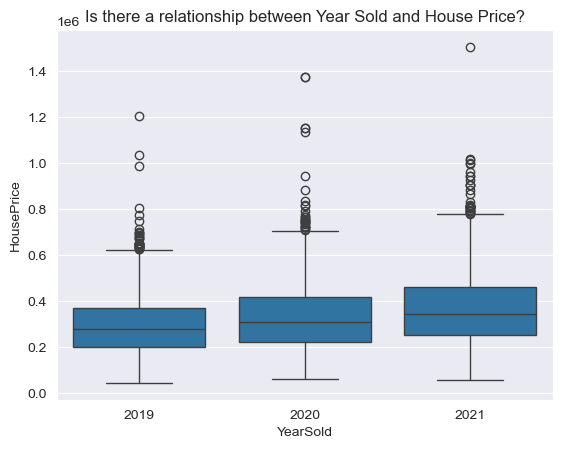

In [42]:
plt.title("Is there a relationship between Year Sold and House Price?")
sns.boxplot(x=train['YearSold'], y=train['HousePrice'])
plt.show()

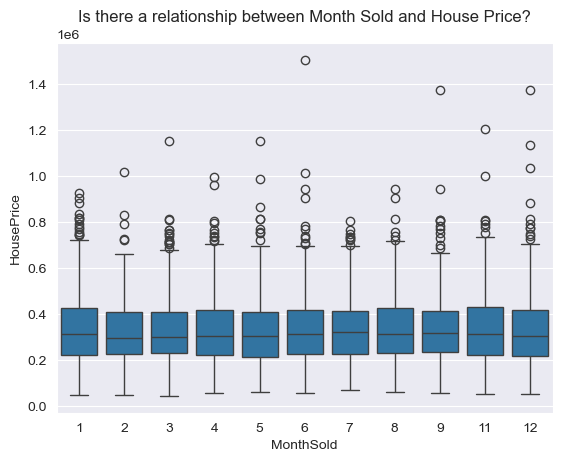

In [43]:
plt.title("Is there a relationship between Month Sold and House Price?")
sns.boxplot(x=train['MonthSold'], y=train['HousePrice'])
plt.show()

# Data preprocessing

In [44]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

#### Structure of the Preprocessor
* <b>fit</b> : is learning things like the mean or std on the dataset
* <b>transform</b>: applies the preprocessing 

In [45]:
inputer = SimpleImputer() # the null values become the mean of the column

In [46]:
inputer.fit(train[['HouseAge','DistanceToStation','NumberOfPubs']])

SimpleImputer()

In [47]:
inputer.transform(train[['HouseAge','DistanceToStation','NumberOfPubs']])

array([[3.40000000e+01, 4.60994365e+02, 8.00000000e+00],
       [1.70000000e+01, 6.14851833e+02, 3.00000000e+00],
       [3.40000000e+01, 2.85892687e+02, 9.00000000e+00],
       ...,
       [1.60000000e+01, 6.05834036e+02, 2.00000000e+00],
       [3.60000000e+01, 3.45823461e+01, 7.00000000e+00],
       [1.20000000e+01, 1.59998338e+03, 1.00000000e+00]])

In [48]:
# One hot example
oneHot = OneHotEncoder()
oneHot.fit(train[['PostCode']])
encodedPostCode = oneHot.transform(train[['PostCode']])
encodedPostCode

<6541x5 sparse matrix of type '<class 'numpy.float64'>'
	with 6541 stored elements in Compressed Sparse Row format>

In [49]:
encodedPostCode.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [50]:
oneHot.get_feature_names_out()

array(['PostCode_5212.0', 'PostCode_5213.0', 'PostCode_5217.0',
       'PostCode_5222.0', 'PostCode_5614.0'], dtype=object)

Is very important that when we train a preprocessor on train data like above, when we're testing or predicting we still have to use the train parameters on the preprocessor. 
We don't have to train another preprocessor on the train data

# StandardScaler and Standard Deviation

#### Centered around 0
#### Has std 1

## **What is StandardScaler?**
**StandardScaler** is a preprocessing technique in scikit-learn that standardizes features by removing the mean and scaling to unit variance.


### **Why use it?**
1. Ensures all features have **mean = 0** and **standard deviation = 1**.
2. Improves performance for algorithms sensitive to feature scaling (e.g., SVM, PCA, Logistic Regression).

---

## **What is Standard Deviation?**
**Standard Deviation (STD)** measures the dispersion or spread of data around the mean.

### **Usage**:
- Low STD: data points are close to the mean.
- High STD: data points are more spread out.

In [51]:
class Preprocessor(BaseEstimator, TransformerMixin):
    # Train our custom preprocessors
    def fit(self, X, y=None):
        self.imputer = SimpleImputer()
        self.imputer.fit(X[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])

        self.scaler = StandardScaler()
        self.scaler.fit(X[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])

        self.oneHot = OneHotEncoder(handle_unknown='ignore')
        self.oneHot.fit(X[['PostCode']])

        return self

    # Apply our custom preprocessors
    def transform(self, X):
        transformed_df = X.copy()

        # Imputer
        imputed_cols = self.imputer.transform(X[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
        transformed_df[['HouseAge', 'DistanceToStation', 'NumberOfPubs']] = imputed_cols

        # Standard Scaler
        scaled_cols = self.scaler.transform(transformed_df[['HouseAge', 'DistanceToStation', 'NumberOfPubs']])
        transformed_df[['HouseAge', 'DistanceToStation', 'NumberOfPubs']] = scaled_cols

        # Apply year and month transformation
        transformed_df['Year'] = X['TransactionDate'].apply(lambda x: x[:4]).astype(int)
        transformed_df['Month'] = X['TransactionDate'].apply(lambda x: x[5:]).astype(int)
        transformed_df = transformed_df.drop('TransactionDate',axis=1)

        # One Hot Encoder
        onehot_encoded = self.oneHot.transform(X[['PostCode']]).toarray()
        onehot_feature_names = self.oneHot.get_feature_names_out(['PostCode'])
        onehot_df = pd.DataFrame(onehot_encoded, columns=onehot_feature_names, index=X.index)

        # Drop original 'PostCode' column and append the one-hot encoded features
        transformed_df = transformed_df.drop('PostCode', axis=1)
        transformed_df = pd.concat([transformed_df, onehot_df], axis=1)

        return transformed_df 

In [52]:
preproc = Preprocessor()

In [53]:
preproc.fit(train)

Preprocessor()

In [54]:
train.drop(['YearSold','MonthSold'],axis = 1)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286.0
5758,2020.01,17.0,614.851833,3.0,5213.0,253332.0
4030,2021.06,34.0,285.892687,9.0,5614.0,486532.0
8447,2020.12,0.0,195.213314,6.0,5222.0,595168.0
4370,2019.03,34.0,124.082230,8.0,5212.0,250495.0
...,...,...,...,...,...,...
664,2020.08,37.0,375.427313,1.0,5217.0,301492.0
7540,2020.08,34.0,114.362370,5.0,5212.0,174239.0
7221,2020.02,16.0,605.834036,2.0,5217.0,327666.0


In [55]:
preprocessed_df = preproc.transform(train)
preprocessed_df.head()

,HouseAge,DistanceToStation,NumberOfPubs,HousePrice,YearSold,MonthSold,Year,Month,PostCode_5212.0,PostCode_5213.0,PostCode_5217.0,PostCode_5222.0,PostCode_5614.0
ID,,,,,,,,,,,,,
8450,1.449005,-0.496716,1.328375,460286.0,2021,2,2021,2,0.0,0.0,0.0,0.0,1.0
5758,-0.033105,-0.375573,-0.363196,253332.0,2020,1,2020,1,0.0,1.0,0.0,0.0,0.0
4030,1.449005,-0.634586,1.666689,486532.0,2021,6,2021,6,0.0,0.0,0.0,0.0,1.0
8447,-1.515216,-0.705984,0.651746,595168.0,2020,12,2020,12,0.0,0.0,0.0,1.0,0.0
4370,1.449005,-0.761991,1.328375,250495.0,2019,3,2019,3,1.0,0.0,0.0,0.0,0.0


In [56]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6541 entries, 8450 to 8915
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HouseAge           6541 non-null   float64
 1   DistanceToStation  6541 non-null   float64
 2   NumberOfPubs       6541 non-null   float64
 3   HousePrice         6541 non-null   float64
 4   YearSold           6541 non-null   int64  
 5   MonthSold          6541 non-null   int64  
 6   Year               6541 non-null   int64  
 7   Month              6541 non-null   int64  
 8   PostCode_5212.0    6541 non-null   float64
 9   PostCode_5213.0    6541 non-null   float64
 10  PostCode_5217.0    6541 non-null   float64
 11  PostCode_5222.0    6541 non-null   float64
 12  PostCode_5614.0    6541 non-null   float64
dtypes: float64(9), int64(4)
memory usage: 715.4 KB


We can see that each value are not null now

# Clean up Analysis Features

In [57]:
train = train.drop(['YearSold','MonthSold'],axis=1)

In [58]:
train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286.0
5758,2020.01,17.0,614.851833,3.0,5213.0,253332.0
4030,2021.06,34.0,285.892687,9.0,5614.0,486532.0
8447,2020.12,0.0,195.213314,6.0,5222.0,595168.0
4370,2019.03,34.0,124.082230,8.0,5212.0,250495.0


In [59]:
# Create X an y values
X_train = train.drop('HousePrice',axis=1)
y_train = train['HousePrice']

In [60]:
X_train

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
ID,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0
5758,2020.01,17.0,614.851833,3.0,5213.0
4030,2021.06,34.0,285.892687,9.0,5614.0
8447,2020.12,0.0,195.213314,6.0,5222.0
4370,2019.03,34.0,124.082230,8.0,5212.0
...,...,...,...,...,...
664,2020.08,37.0,375.427313,1.0,5217.0
7540,2020.08,34.0,114.362370,5.0,5212.0
7221,2020.02,16.0,605.834036,2.0,5217.0


In [61]:
y_train

ID
8450    460286.0
5758    253332.0
4030    486532.0
8447    595168.0
4370    250495.0
          ...   
664     301492.0
7540    174239.0
7221    327666.0
1318    392231.0
8915    213263.0
Name: HousePrice, Length: 6541, dtype: float64

# Modelling
* <b> Pipeline </b> -> A series of steps to train the model

In [62]:
# Import ML Dependencies: pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

## Create a pipeline

In [63]:
pipelines = {
    'ridge': make_pipeline(Preprocessor(), Ridge()),
    'rf':make_pipeline(Preprocessor(), RandomForestRegressor()),
    'gb':make_pipeline(Preprocessor(), GradientBoostingRegressor()),
    'xg':make_pipeline(Preprocessor(),XGBRegressor())
}

In [64]:
pipelines['ridge']

Pipeline(steps=[('preprocessor', Preprocessor()), ('ridge', Ridge())])

## Create Tuning Grids
We prepare the algorithms hyperparameters so we can change them to get the best results

In [65]:
pipelines['ridge'].get_params()

{'memory': None,
 'steps': [('preprocessor', Preprocessor()), ('ridge', Ridge())],
 'verbose': False,
 'preprocessor': Preprocessor(),
 'ridge': Ridge(),
 'ridge__alpha': 1.0,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__positive': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.0001}

In [66]:
grid = {
    'ridge': {
        'ridge__alpha': [0.05, 0.25, 0.5, 1.0]
    },
    'rf': {
        'randomforestregressor__n_estimators': [100, 200, 300],
        'randomforestregressor__max_depth': [5, 6, 7, None]
    },
    'gb': {
        'gradientboostingregressor__n_estimators': [100, 200, 300],
        'gradientboostingregressor__max_depth': [5, 6, 7, None]
    },
    'xg': {
        'xgbregressor__n_estimators': [100, 200, 300],
        'xgbregressor__max_depth': [5, 6, 7, None]
    }
}

# Train Models and Perform HPO

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
fit_models={}
for algo, pipeline in pipelines.items():
    try:
        print(algo)
        model = GridSearchCV(pipeline,grid[algo], n_jobs=-1, cv=10, scoring='r2')
        model.fit(X_train, y_train)
        fit_models[algo] = model
    except Exception as e:
        print(f'Model {algo} had an error {e}')
        

ridge
rf
gb
xg


# Import evaluation metrics

In [70]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Look for nulls in dataset

In [71]:
test.isnull().sum()

TransactionDate      1
HouseAge             1
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           2
dtype: int64

In [73]:
test = test[~test['HousePrice'].isnull()]

In [74]:
test.isnull().sum()

TransactionDate      0
HouseAge             1
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           0
dtype: int64

## Validate test datatypes

In [75]:
test.dtypes

TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

In [80]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

In [77]:
test = test[test['HousePrice']!='??']
test['HousePrice'] = test['HousePrice'].astype(float)
test['TransactionDate'] = test['TransactionDate'].astype(str)
test['PostCode'] = test['PostCode'].astype(str)

In [81]:
test.dtypes == train.dtypes

TransactionDate      True
HouseAge             True
DistanceToStation    True
NumberOfPubs         True
PostCode             True
HousePrice           True
dtype: bool

## Create X and y test

In [82]:
X_test = test.drop('HousePrice', axis = 1)
y_test = test['HousePrice']

In [83]:
X_test

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
ID,,,,,
7857,2021.11,0.0,267.000535,6.0,5222.0
1641,2021.04,12.0,500.080510,5.0,5212.0
3620,2019.07,14.0,4024.663391,0.0,5614.0
2820,2020.09,18.0,568.954185,4.0,5614.0
1572,2020.07,11.0,44.210016,1.0,5614.0
...,...,...,...,...,...
435,2019.01,15.0,65.175746,6.0,5213.0
3452,2019.08,34.0,91.565899,8.0,5222.0
2127,2019.03,1.0,31.798854,6.0,5217.0


In [84]:
y_test

ID
7857    919497.0
1641    283680.0
3620    135818.0
2820    468742.0
1572    311065.0
          ...   
435     234950.0
3452    467844.0
2127    502553.0
7510    766626.0
641     437310.0
Name: HousePrice, Length: 2803, dtype: float64

## Calculate regression metrix

In [86]:
for algo, model in fit_models.items():
    ypred = model.predict(X_test)
    r2 = r2_score(y_test, ypred)
    mae = mean_absolute_error(y_test,ypred)
    print(f'{algo}: R2 Score: {r2}, MAE Score:{mae}')

ridge: R2 Score: 0.6691443155811754, MAE Score:62578.08779739688
rf: R2 Score: 0.8221549961189505, MAE Score:44253.232182185755
gb: R2 Score: 0.8632430893829557, MAE Score:38670.779704902874
xg: R2 Score: 0.856389713877994, MAE Score:39308.03106325812


### GB is the best performing algorithm

## Make Predictions

In [91]:
model = fit_models['gb']

In [92]:
ypred = model.predict(X_test)
ypred

array([660072.29726806, 289177.79297644, 166619.49465334, ...,
       392935.05936691, 737461.9967578 , 391258.28649689])

In [93]:
results_df = y_test.to_frame()
results_df['ypred'] = ypred
results_df['delta'] = results_df.HousePrice.astype(float) - results_df.ypred

In [94]:
results_df

,HousePrice,ypred,delta
ID,,,
7857,919497.0,660072.297268,259424.702732
1641,283680.0,289177.792976,-5497.792976
3620,135818.0,166619.494653,-30801.494653
2820,468742.0,398384.284510,70357.715490
1572,311065.0,389518.489960,-78453.489960
...,...,...,...
435,234950.0,312868.879993,-77918.879993
3452,467844.0,464408.266592,3435.733408
2127,502553.0,392935.059367,109617.940633


# Extract feature importance

### Advantage of ML Models Over Neural Networks: Interpretability

Machine Learning (ML) models like decision trees, linear regression, or support vector machines often provide greater **interpretability** compared to Neural Networks (NN). While Neural Networks are powerful, they act as **black boxes**, meaning their decision-making process is difficult to understand due to their complex architecture and high dimensionality.

In contrast, many ML models offer:
- **Transparent decision-making:** The reasoning behind predictions can often be directly observed (e.g., tree splits or coefficients).
- **Ease of debugging and trust:** Users can identify biases or errors and justify decisions, critical in domains like healthcare and finance.

Neural Networks, while accurate, often sacrifice this clarity for performance, making traditional ML models a more interpretable choice in scenarios where explainability is key.

In [96]:
model.best_estimator_

Pipeline(steps=[('preprocessor', Preprocessor()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=5, n_estimators=300))])

In [108]:
ensemble = model.best_estimator_['gradientboostingregressor'] # get the best hyperparameters
ensemble

GradientBoostingRegressor(max_depth=5, n_estimators=300)

In [109]:
model.best_estimator_['gradientboostingregressor'].feature_importances_

array([0.12745668, 0.46760154, 0.04493712, 0.05181509, 0.0062393 ,
       0.02392892, 0.00647918, 0.00972051, 0.17484589, 0.08697578])

In [110]:
sum(model.best_estimator_['gradientboostingregressor'].feature_importances_)# sum of them equals 1

1.0

<BarContainer object of 10 artists>

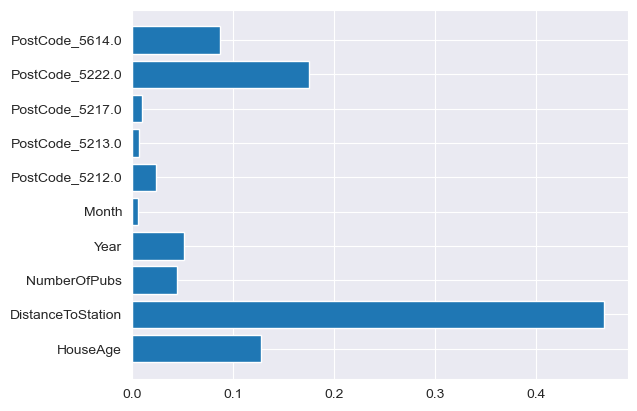

In [111]:
plt.barh(ensemble.feature_names_in_, ensemble.feature_importances_)

#### So the distance to station is the most important feature

# Calculate feature importance for all models

In [112]:
!pip install numpy

In [113]:
import numpy as np

In [116]:
feature_importances = {}
for algo, pipeline in fit_models.items():
    if algo == 'ridge':
        # Calculate alternative metric for Ridge regression
        coef_ = pipeline.best_estimator_[1].coef_
        feature_importances[algo] = np.square(coef_) / np.sum(np.square(coef_))
    else:
        # Use feature importances for other algorithms
        feature_importances[algo] = pipeline.best_estimator_[1].feature_importances_

In [117]:
feature_importances

{'ridge': array([1.64842453e-02, 1.01874497e-01, 3.10969377e-02, 3.86862977e-02,
        5.94596526e-06, 2.25704876e-01, 9.47271060e-02, 1.69412578e-02,
        3.92285970e-01, 8.21928660e-02]),
 'rf': array([0.13641114, 0.44506458, 0.05611717, 0.05041967, 0.03455678,
        0.00816565, 0.00270226, 0.01273805, 0.16724444, 0.08658025]),
 'gb': array([0.12745668, 0.46760154, 0.04493712, 0.05181509, 0.0062393 ,
        0.02392892, 0.00647918, 0.00972051, 0.17484589, 0.08697578]),
 'xg': array([0.03630189, 0.09950483, 0.02019886, 0.06381075, 0.00548409,
        0.07154408, 0.01112794, 0.07640759, 0.3810329 , 0.23458697],
       dtype=float32)}

In [118]:
importances_df = pd.DataFrame(feature_importances, index = ensemble.feature_names_in_)
importances_df

,ridge,rf,gb,xg
HouseAge,0.016484,0.136411,0.127457,0.036302
DistanceToStation,0.101874,0.445065,0.467602,0.099505
NumberOfPubs,0.031097,0.056117,0.044937,0.020199
Year,0.038686,0.050420,0.051815,0.063811
Month,0.000006,0.034557,0.006239,0.005484
PostCode_5212.0,0.225705,0.008166,0.023929,0.071544
PostCode_5213.0,0.094727,0.002702,0.006479,0.011128
PostCode_5217.0,0.016941,0.012738,0.009721,0.076408
PostCode_5222.0,0.392286,0.167244,0.174846,0.381033
PostCode_5614.0,0.082193,0.086580,0.086976,0.234587


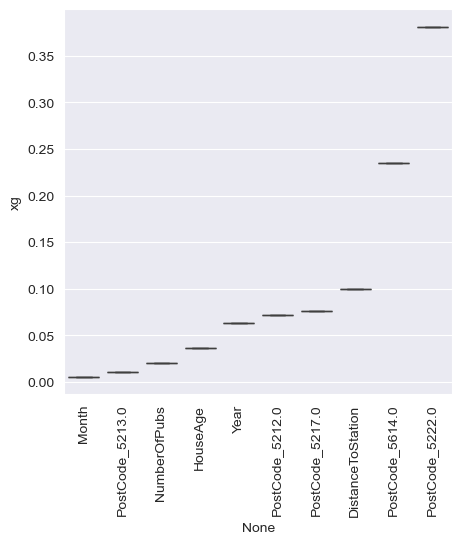

In [119]:
plt.figure(figsize=(5,5))
model_name = 'xg'
sorted_imp = importances_df.sort_values(model_name)
sns.boxplot(x = sorted_imp.index, y = model_name, data= sorted_imp)
plt.xticks(rotation=90)
plt.show()

In [120]:
# TODO PLOT DECISIONS TREE